In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#### Importing Dataset
1. Since data is in form of excel file we have to use pandas `read_excel` to load the data
2. After loading it ,It is important to check the complete info about the data as it can indicate many of hidden information such as null vales in a column or a row
3. Check whether any null value is there or not.
4. Describe the data which can give statistical analysis

In [169]:
train_data = pd.read_excel('Data_Train.xlsx')

In [170]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [171]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [172]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [173]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### As you can see there is only one null  value present in `Total_Stops` columns.So we can drop that null value.

In [174]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [175]:
train_data.dropna(inplace = True)

In [176]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [177]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [178]:
train_data['Arrival_Time'] = train_data['Arrival_Time'].apply(lambda x : x.split()[0])

In [179]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [180]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [181]:
train_data['Journey_day']=pd.to_datetime(train_data.Date_of_Journey,format = '%d/%m/%Y').dt.day

In [182]:
train_data['Journey_ month']=pd.to_datetime(train_data.Date_of_Journey,format = '%d/%m/%Y').dt.month

In [183]:
train_data['Journey_ weekday']=pd.to_datetime(train_data.Date_of_Journey,format = '%d/%m/%Y').dt.weekday

In [184]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_ month,Journey_ weekday
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,6
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,6
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4


In [185]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Date_of_Journey   10682 non-null  object
 2   Source            10682 non-null  object
 3   Destination       10682 non-null  object
 4   Route             10682 non-null  object
 5   Dep_Time          10682 non-null  object
 6   Arrival_Time      10682 non-null  object
 7   Duration          10682 non-null  object
 8   Total_Stops       10682 non-null  object
 9   Additional_Info   10682 non-null  object
 10  Price             10682 non-null  int64 
 11  Journey_day       10682 non-null  int64 
 12  Journey_ month    10682 non-null  int64 
 13  Journey_ weekday  10682 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.2+ MB


In [186]:
train_data.drop(['Date_of_Journey'],axis =1,inplace = True)

In [187]:
train_data['Dep_hour']=pd.to_datetime(train_data['Dep_Time']).dt.hour

In [188]:
train_data['Dep_min']=pd.to_datetime(train_data['Dep_Time']).dt.minute

In [189]:
###now we can drop Dep_Time as it is of no use
train_data.drop(['Dep_Time'],axis =1,inplace =True)

In [190]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_ month,Journey_ weekday,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,non-stop,No info,3897,24,3,6,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25,19h,2 stops,No info,13882,9,6,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,6,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,4,16,50


In [191]:
train_data['Arr_Hour']=pd.to_datetime(train_data['Arrival_Time']).dt.hour

In [192]:
train_data['Arr_Min']=pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [193]:
###now we can drop Dep_Time as it is pf no use
train_data.drop(['Arrival_Time'],axis =1,inplace =True)

In [194]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_ month,Journey_ weekday,Dep_hour,Dep_min,Arr_Hour,Arr_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,6,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,6,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,4,16,50,21,35


In [195]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extr

In [196]:
### Adding duration hours and duration mins in my datatset
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [197]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_ month,Journey_ weekday,Dep_hour,Dep_min,Arr_Hour,Arr_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,6,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,6,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,4,16,50,21,35,4,45


In [198]:
#### Visualizing data

### airline
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

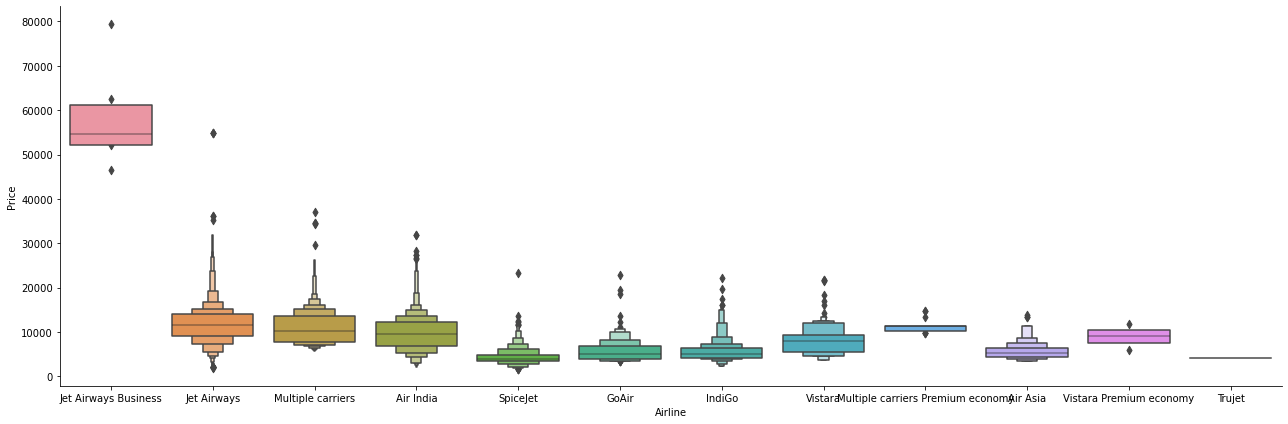

In [199]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

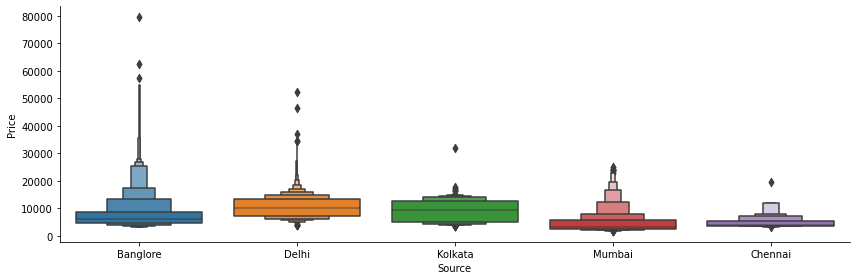

In [200]:
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

<AxesSubplot:xlabel='Journey_ weekday', ylabel='Count'>

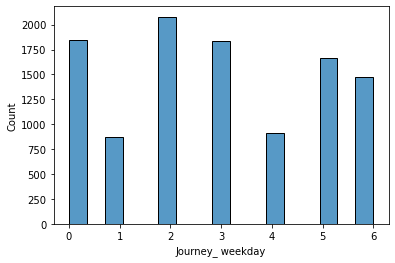

In [201]:
sns.histplot(data= train_data,x='Journey_ weekday')

<AxesSubplot:xlabel='Journey_ month', ylabel='Count'>

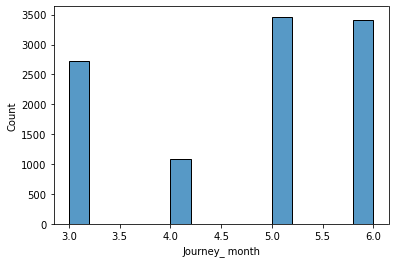

In [202]:
sns.histplot(data= train_data,x='Journey_ month')

<AxesSubplot:xlabel='Journey_ month', ylabel='Price'>

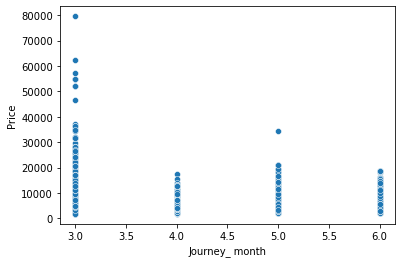

In [203]:
sns.scatterplot(x='Journey_ month',y='Price',data = train_data)

<AxesSubplot:xlabel='Journey_ weekday', ylabel='Price'>

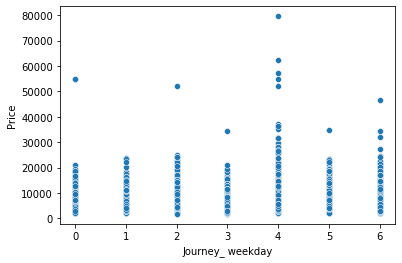

In [204]:
sns.scatterplot(x='Journey_ weekday',y='Price',data = train_data)

In [205]:
### removing outliers

In [206]:
train_data = train_data[train_data['Price'] <30000]

In [207]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10658 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10658 non-null  object
 1   Source            10658 non-null  object
 2   Destination       10658 non-null  object
 3   Route             10658 non-null  object
 4   Duration          10658 non-null  object
 5   Total_Stops       10658 non-null  object
 6   Additional_Info   10658 non-null  object
 7   Price             10658 non-null  int64 
 8   Journey_day       10658 non-null  int64 
 9   Journey_ month    10658 non-null  int64 
 10  Journey_ weekday  10658 non-null  int64 
 11  Dep_hour          10658 non-null  int64 
 12  Dep_min           10658 non-null  int64 
 13  Arr_Hour          10658 non-null  int64 
 14  Arr_Min           10658 non-null  int64 
 15  Duration_hours    10658 non-null  int64 
 16  Duration_mins     10658 non-null  int64 
dtypes: int64(10)

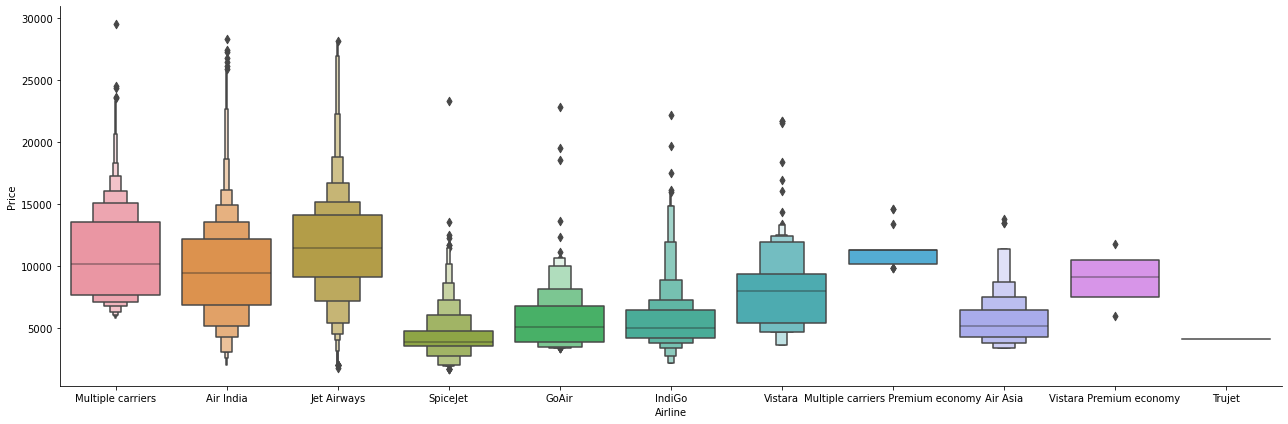

In [208]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

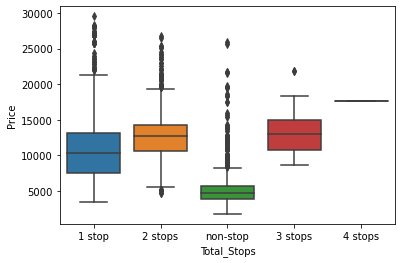

In [209]:
sns.boxplot(y = "Price", x = "Total_Stops", data = train_data.sort_values("Price", ascending = False))


### Conclusion

    #### Fare vs airline
    1. Jet business class have more fare charges as comapred to others as they are providing business class service to their customers.We can remove it as we dont have enough sample to made further predictions.
    2. Other ailrlines fare charges seems equal around 10,000 inr
    3. we can consider fare charges above 50,000 inr as outliers as they will affect our prediction.
    ##### Fare vs Source
    1. we can see slight difference in fare charges when you fly from beng instead of other sources 
    #### number of flight vs weekdays vs fares
    1. we can clearly see high number of flights on weekends as compared to weekdays 
    2. Flight charges are pretty high on weekends as compared to weekdays 
    #### no of stops 
    1. one of the important factor in this project
    2. we can see increase in fares as number of stops increases



### we will convert these categorical variables 
we will be using one hot encoding as Airline is nominal categorical data


In [210]:
train_data['Airline'].value_counts()

Jet Airways                          3837
IndiGo                               2053
Air India                            1749
Multiple carriers                    1192
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [211]:
train_data.loc[train_data['Airline'].value_counts()[train_data['Airline']].values<100] ='Rare'

In [212]:
train_data['Airline'].value_counts()

Jet Airways          3837
IndiGo               2053
Air India            1749
Multiple carriers    1192
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Rare                   17
Name: Airline, dtype: int64

In [213]:
Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline,drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Rare,Airline_SpiceJet,Airline_Vistara
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [214]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Source_Rare
0,0,0,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,0,0,0


In [215]:
train_data["Destination"].value_counts()

Cochin       4517
Banglore     2870
Delhi        1264
New Delhi     914
Hyderabad     696
Kolkata       380
Rare           17
Name: Destination, dtype: int64

In [216]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Destination_Rare
0,0,0,0,0,1,0
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,1,0


In [217]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [218]:
train_data["Total_Stops"].value_counts()

1 stop      5593
non-stop    3487
2 stops     1515
3 stops       45
Rare          17
4 stops        1
Name: Total_Stops, dtype: int64

In [219]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4,'Rare':-1}, inplace = True)

In [220]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_ month,Journey_ weekday,Dep_hour,Dep_min,Arr_Hour,Arr_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,6,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,2,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,6,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,4,16,50,21,35,4,45


In [221]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [222]:
data_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_ month,Journey_ weekday,Dep_hour,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Source_Rare,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Destination_Rare
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,6,22,...,0,0,0,0,0,0,0,0,1,0
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,2,5,...,0,1,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,6,9,...,1,0,0,0,1,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,6,18,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,4,16,...,0,0,0,0,0,0,0,0,1,0


In [223]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [122]:
data_train.drop(["Airline", "Source", "Destination",'Journey_ month'], axis = 1, inplace = True)

In [123]:
data_train.drop(['Duration'], axis = 1, inplace = True)

In [124]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_ weekday,Dep_hour,Dep_min,Arr_Hour,Arr_Min,Duration_hours,Duration_mins,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Source_Rare,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Destination_Rare
0,0,3897,24,6,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,1,0
1,2,7662,1,2,5,50,13,15,7,25,...,0,1,0,0,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,1,0,0,0,1,0,0,0,0,0
3,1,6218,12,6,18,5,23,30,5,25,...,0,1,0,0,0,0,0,0,0,0
4,1,13302,1,4,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,1,0


In [224]:
data_train.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_ month', 'Journey_ weekday', 'Dep_hour',
       'Dep_min', 'Arr_Hour', 'Arr_Min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Rare',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Source_Rare', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Destination_Rare'],
      dtype='object')

In [225]:
x=data_train[['Total_Stops','Journey_day', 'Journey_ weekday', 'Dep_hour',
       'Dep_min', 'Arr_Hour', 'Arr_Min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Rare',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Source_Rare', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Destination_Rare']]

In [226]:
x

,Total_Stops,Journey_day,Journey_ weekday,Dep_hour,Dep_min,Arr_Hour,Arr_Min,Duration_hours,Duration_mins,Airline_Air India,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Source_Rare,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Destination_Rare
0,0,24,6,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1,2,5,50,13,15,7,25,1,...,0,1,0,0,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,12,6,18,5,23,30,5,25,0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,4,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,1,19,55,22,25,2,30,0,...,0,1,0,0,0,0,0,0,0,0
10679,0,27,5,20,45,23,20,2,35,1,...,0,1,0,0,0,0,0,0,0,0
10680,0,27,5,8,20,11,20,3,0,0,...,0,0,0,0,0,1,0,0,0,0
10681,0,1,4,11,30,14,10,2,40,0,...,0,0,0,0,0,0,0,0,1,0


In [227]:
vif_data

,feature
0,Total_Stops
1,Price
2,Journey_day
3,Journey_ weekday
4,Dep_hour
5,Dep_min
6,Arr_Hour
7,Arr_Min
8,Duration_hours
9,Duration_mins


In [228]:
data_train.shape

(10658, 34)

In [229]:
data_train.to_csv('Cleaned_Data.csv',index = False)

In [230]:
#### Test data

In [231]:

test_data = pd.read_excel('Test_set.xlsx')

In [232]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [233]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

test_data.loc[test_data['Airline'].value_counts()[test_data['Airline']].values<100] ='Rare'
# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4,'Rare':-1}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

### Feature Selection


Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

**heatmap**

**feature_importance_**

**SelectKBest**

In [234]:
data_train.shape

(10658, 34)

In [235]:
data_train.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_ month', 'Journey_ weekday', 'Dep_hour',
       'Dep_min', 'Arr_Hour', 'Arr_Min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Rare',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Source_Rare', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Destination_Rare'],
      dtype='object')

In [241]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_ weekday', 'Dep_hour',
       'Dep_min', 'Arr_Hour', 'Arr_Min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Rare',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Source_Rare', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Destination_Rare']]
X.head()

,Total_Stops,Journey_day,Journey_ weekday,Dep_hour,Dep_min,Arr_Hour,Arr_Min,Duration_hours,Duration_mins,Airline_Air India,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Source_Rare,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Destination_Rare
0,0,24,6,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1,2,5,50,13,15,7,25,1,...,0,1,0,0,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,12,6,18,5,23,30,5,25,0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,4,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,1,0


In [245]:
y = data_train['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

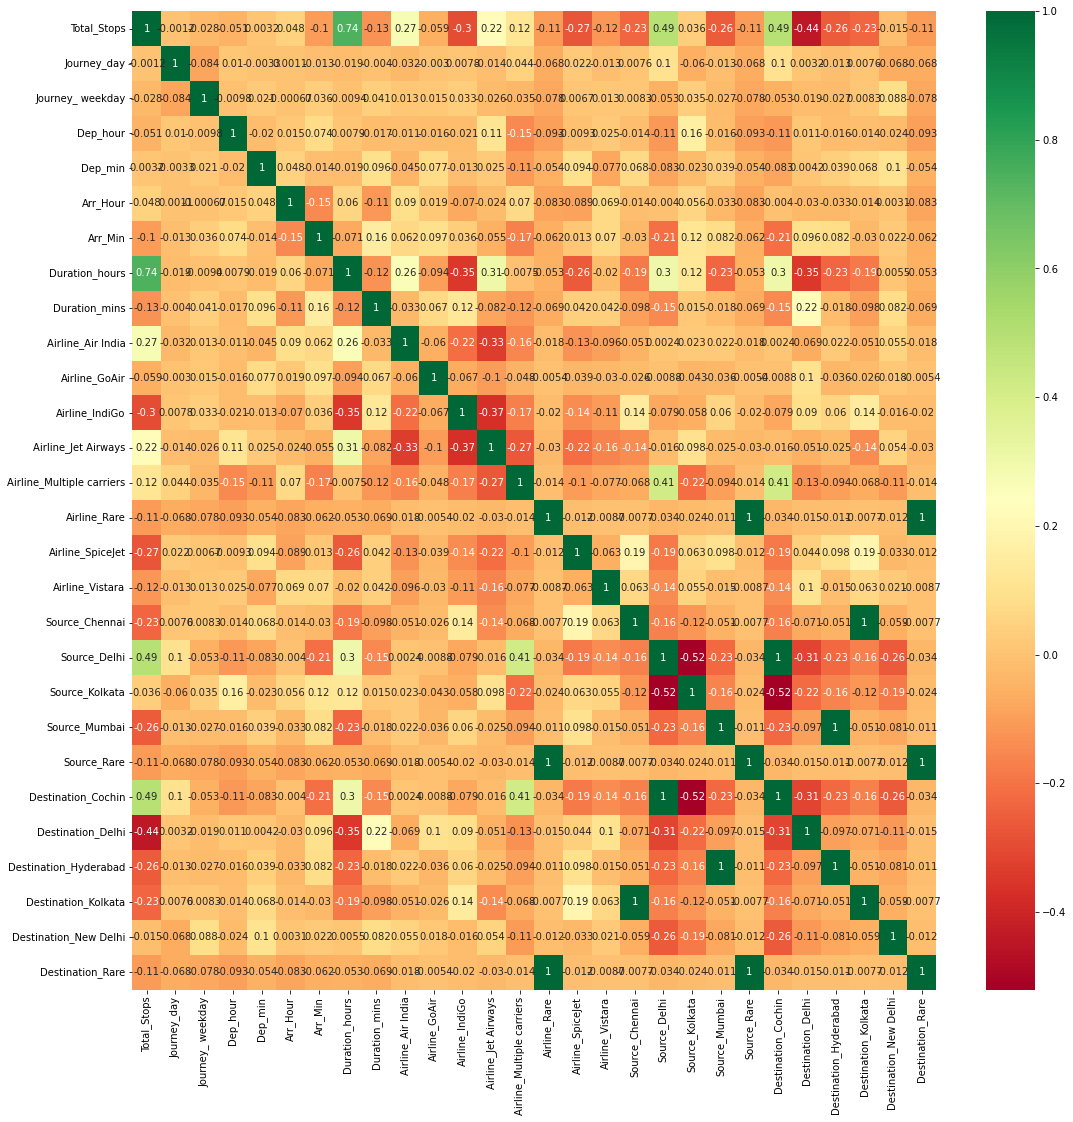

In [246]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(X.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [247]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [248]:
print(selection.feature_importances_)

[0.21338675 0.11818485 0.05634435 0.02760137 0.02481067 0.02367096
 0.02720356 0.17229303 0.01822464 0.01839549 0.00248251 0.01636121
 0.15198943 0.02584341 0.00030621 0.00349782 0.00623737 0.00043988
 0.01574659 0.00571901 0.00676942 0.00040063 0.01227672 0.01904896
 0.00949206 0.00032586 0.02272588 0.00022138]


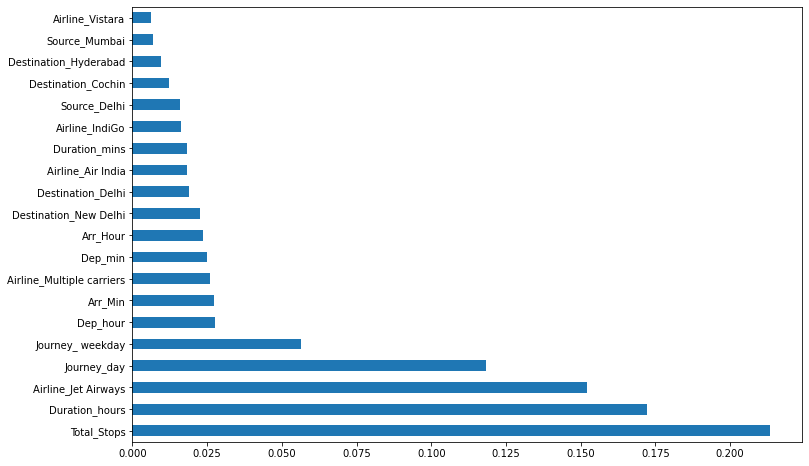

In [249]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [250]:
## with the following function we can select highly correlated features
## it will remove the first feature that is correlated with anything other feature


def correlation(dataset,threshold):
    col_corr = set()##set of all the names of correalted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:#we are interested in absolute coeff value
                colname = corr_matrix.columns[i]##getting the name column
                col_corr.add(colname)
                
    return col_corr 

In [251]:
corr_features = correlation(X , 0.7)
len(set(corr_features))

6

In [252]:
corr_features

{'Destination_Cochin',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Destination_Rare',
 'Duration_hours',
 'Source_Rare'}

In [253]:
X.columns

Index(['Total_Stops', 'Journey_day', 'Journey_ weekday', 'Dep_hour', 'Dep_min',
       'Arr_Hour', 'Arr_Min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Rare',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Source_Rare', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Destination_Rare'],
      dtype='object')

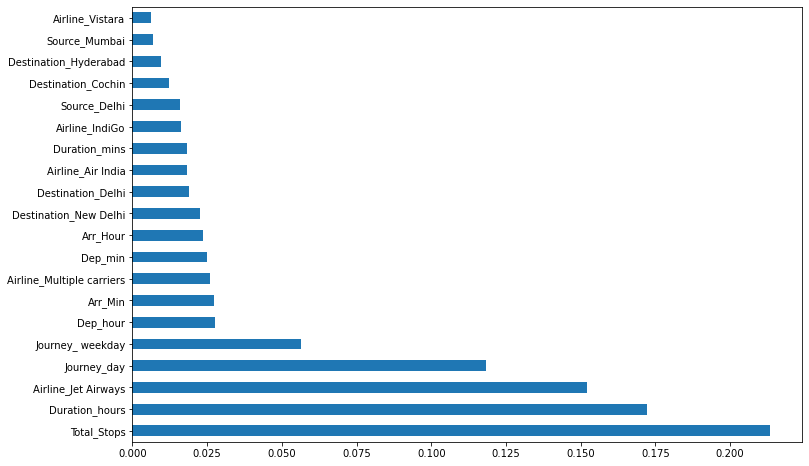

In [254]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [89]:
#### performing model evaluation


In [255]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [256]:
from sklearn.feature_selection import mutual_info_regression
##determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0),y_train)
mutual_info

array([0.78746552, 0.21999706, 0.14283094, 0.29604815, 0.26471062,
       0.39858034, 0.34674338, 0.46702859, 0.3319947 , 0.28750364,
       0.03694901, 0.34678144, 0.5402841 , 0.25612701, 0.01396444,
       0.18905931, 0.13051158, 0.13797539, 0.51862277, 0.44799234,
       0.20193126, 0.00543259, 0.51168913, 0.31375875, 0.1880186 ,
       0.12766434, 0.1602655 , 0.00945202])

In [257]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

Total_Stops                  0.787466
Airline_Jet Airways          0.540284
Source_Delhi                 0.518623
Destination_Cochin           0.511689
Duration_hours               0.467029
Source_Kolkata               0.447992
Arr_Hour                     0.398580
Airline_IndiGo               0.346781
Arr_Min                      0.346743
Duration_mins                0.331995
Destination_Delhi            0.313759
Dep_hour                     0.296048
Airline_Air India            0.287504
Dep_min                      0.264711
Airline_Multiple carriers    0.256127
Journey_day                  0.219997
Source_Mumbai                0.201931
Airline_SpiceJet             0.189059
Destination_Hyderabad        0.188019
Destination_New Delhi        0.160265
Journey_ weekday             0.142831
Source_Chennai               0.137975
Airline_Vistara              0.130512
Destination_Kolkata          0.127664
Airline_GoAir                0.036949
Airline_Rare                 0.013964
Destination_

<AxesSubplot:>

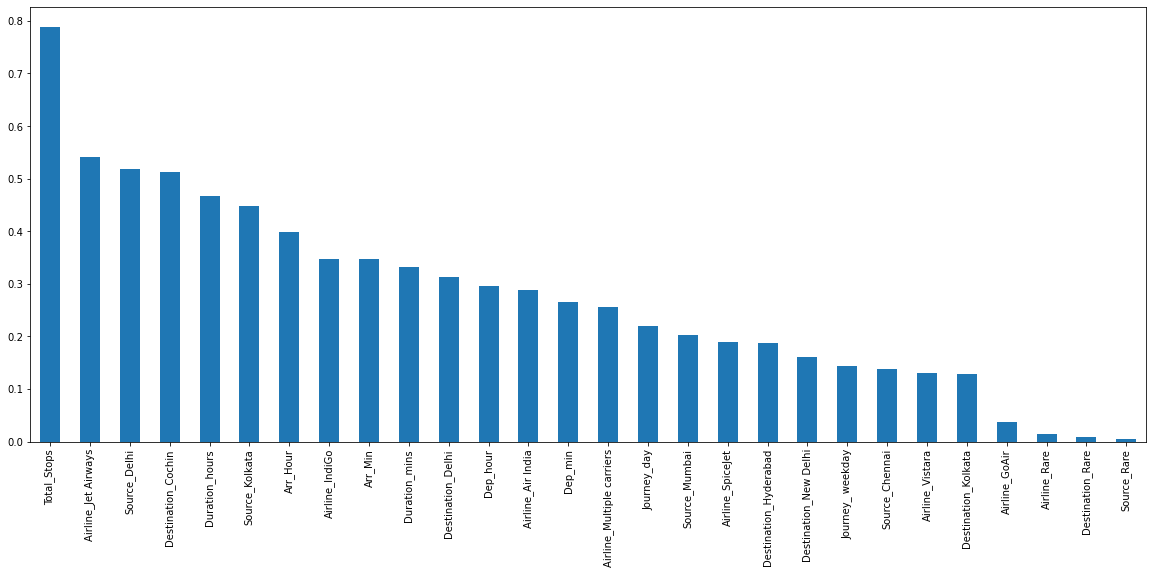

In [258]:
##LET'S PLOT THE ORDERED MUTUAL_INFO VALUES PER FEATURE
mutual_info.sort_values(ascending = False).plot.bar(figsize = (20,8))

In [259]:
from sklearn.feature_selection import SelectKBest

In [165]:
## No we will select the top 5 important features
sel_five_cols = SelectKBest(mutual_info_regression,k=10)
sel_five_cols.fit(X_train.fillna(0),y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Total_Stops', 'Arr_Hour', 'Arr_Min', 'Duration_hours', 'Duration_mins',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Source_Delhi',
       'Source_Kolkata', 'Destination_Cochin'],
      dtype='object')

In [166]:
X_train.columns

Index(['Total_Stops', 'Journey_day', 'Journey_ weekday', 'Dep_hour', 'Dep_min',
       'Arr_Hour', 'Arr_Min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Rare',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Source_Rare', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Destination_Rare'],
      dtype='object')

In [ ]:
X_test.drop()

In [260]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [261]:
l_pred = lasso.predict(X_test)

In [262]:
l_pred

array([14890.53768326,  7637.32744087,  5492.45852065, ...,
        6624.15812876, 11916.6201341 ,  7164.74293316])

In [263]:
from sklearn.metrics import r2_score

In [120]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [121]:
lr.coef_

array([ 3.60943571e+03,  7.13837955e+00,  6.68910859e-01, -4.40533124e+00,
        2.94185282e+03, -2.41533212e+02, -8.85889945e+02, -2.41533212e+02,
       -1.32247031e+03])

In [122]:
lr.intercept_

5660.495969839691

In [264]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [265]:
y_pred = reg_rf.predict(X_test)

In [266]:
reg_rf.score(X_train, y_train)

0.9484137123600953

In [267]:
reg_rf.score(X_test, y_test)

0.8083190487201899

In [268]:
reg_rf

RandomForestRegressor()

In [269]:
y_pred

array([11708.32      ,  4676.29      ,  5603.08      , ...,
        4661.43333333, 11257.01857143,  7817.72      ])

In [270]:
y_test

1956     14887
1092      3687
1811      6094
9987      6496
5432     12681
         ...  
4149      4778
8711     12898
10590     3383
7000     10441
10158     5192
Name: Price, Length: 2132, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


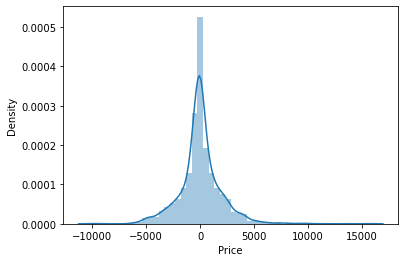

In [271]:
sns.distplot(y_test-y_pred)
plt.show()

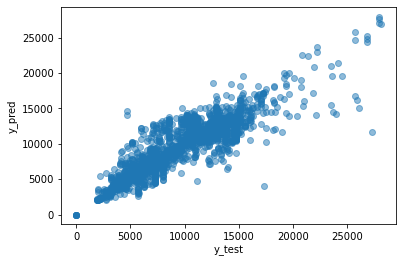

In [272]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [273]:
from sklearn import metrics

In [274]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1274.3668186137788
MSE: 3787266.1482320824
RMSE: 1946.0899640643754


In [275]:
metrics.r2_score(y_test, y_pred)

0.8083190487201899

## Hyperparameter Tuning
** Choose following method for hyperparameter tuning

**RandomizedSearchCV --> Fast**

**GridSearchCV**

Assign hyperparameters in form of dictionery
Fit the model
Check best paramters and best score

In [276]:
from sklearn.model_selection import RandomizedSearchCV

In [277]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [278]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [279]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = , verbose=2,random_state=42, n_jobs = 1)

In [280]:
rf_random.fit(X_train,y_train)

Fitting 7 folds for each of 10 candidates, totalling 70 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=11

C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   5.2s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   5.1s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   5.1s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   5.0s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   5.1s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   5.2s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   5.1s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   9.3s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   9.2s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   9.2s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   9.3s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   9.3s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   9.5s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   9.3s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  13.6s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  15.0s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  17.2s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  14.7s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  14.9s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  20.7s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  19.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  18.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  17.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  17.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  18.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  16.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  17.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  18.1s
[CV] END max_depth=5, max_featur

C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  19.1s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  18.9s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  17.9s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  18.4s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  19.7s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  20.1s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  20.2s


C:\Users\Win11\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=7, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [287]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [301]:
prediction1 = rf_random.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


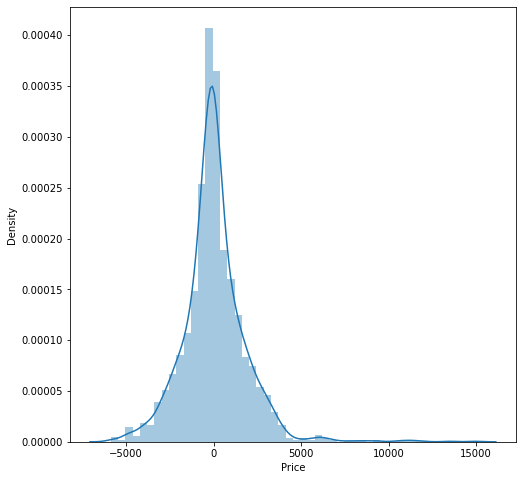

In [302]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction1)
plt.show()

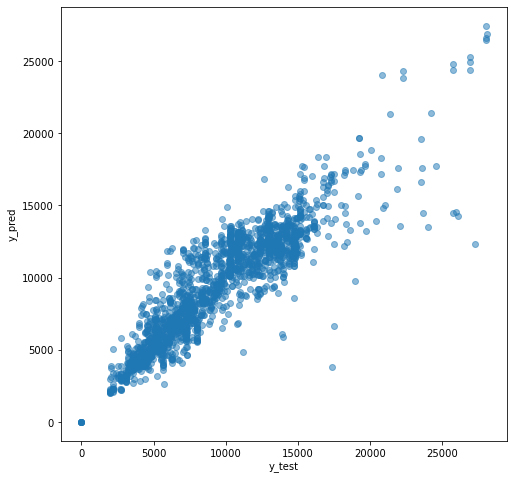

In [303]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction1, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [304]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction1))
print('MSE:', metrics.mean_squared_error(y_test, prediction1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction1)))

MAE: 1233.2216127335716
MSE: 3346177.8085840056
RMSE: 1829.256080646995


In [305]:
metrics.r2_score(y_test, prediction1)

0.8306433927807844

In [306]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [307]:
# Performing GridSearchCV on Decision Tree Regression
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [308]:
# Predicting train and test results
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [309]:
from math import sqrt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error


In [297]:
print("Train Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", metrics.r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
Root Mean squared Error:  1638.2604931723235
Mean Absolute % Error:  0
R-Squared:  0.8529945817593595


In [298]:
print("Test Results for Decision Tree Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-Squared: ", metrics.r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
Root Mean Squared Error:  2104.917864595763
Mean Absolute % Error:  0
R-Squared:  0.775754654193471


In [315]:
random_forest = round(reg_rf.score(X_train, y_train) * 100, 2)
random_forst_test = round(reg_rf.score(X_test, y_test) * 100, 2)

lasso_score = round(lasso.score(X_train, y_train) * 100, 2)
lasso_score_test = round(lasso.score(X_test, y_test) * 100, 2)

decision_score = round(tree.score(X_train, y_train) * 100, 2)
decision_score_test = round(tree.score(X_test, y_test) * 100, 2)

In [316]:
# Comparing all the models
models = pd.DataFrame({
    'Model': [ 'Random Forest Regression', 'Lasso Regression','Decision Tree Regressor'],
    'Score': [ random_forest, lasso_score, decision_score],
    'Test Score': [ random_forst_test, lasso_score_test, decision_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
0,Random Forest Regression,94.84,80.83
2,Decision Tree Regressor,85.30,77.36
1,Lasso Regression,62.26,61.58


In [317]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(tree.get_params())

Parameters currently in use:

{'cv': 10, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__criterion': 'squared_error', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': None, 'estimator__splitter': 'best', 'estimator': DecisionTreeRegressor(), 'n_jobs': None, 'param_grid': {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 0}


In [318]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [319]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)


In [320]:
y_prediction = forest.predict(X_test)

In [321]:
metrics.r2_score(y_test, y_prediction)

0.8306433927807844

In [237]:
rf_random
import xgboost as xg

In [239]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
 
# Fitting the model
xgb_r.fit(X_train, y_train)
 
# Predict the model
pred = xgb_r.predict(X_test)
 


[12:10:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [240]:
metrics.r2_score(y_test, pred)

0.7805027966974007

In [242]:
print("Test Results for XGboost:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, pred)))
print("R-Squared: ", metrics.r2_score(y_test, pred))

Test Results for XGboost:
Root Mean Squared Error:  2069.375666813674
Mean Absolute % Error:  0
R-Squared:  0.7805027966974007
